# The Principle behind the Confocal Simulation written in Julia

## Needed Packages

In [1]:
using Plots
using Colors
gr(size=(500,500))

Plots.GRBackend()

## Create image properties

In [2]:
w0 = 0.3 # um
pixel_size = 0.1 # um
image_size = 15 # px
D = 1.0 # diffusion const. um^2/s

1.0

## Creating the image

In [3]:
image = Array{Float64,2}(undef,image_size,image_size)
Array{Int,2}(floor.(100*image))

15×15 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [4]:
function resetImage(inimage)
    for i in 1:size(inimage)[1], j in 1:size(inimage)[2]
        inimage[i,j] = 0
    end
end

resetImage (generic function with 1 method)

## Make a stationary particle

In [5]:
stationary = rand(Float64,2) * image_size * pixel_size

2-element Array{Float64,1}:
 1.3610213756483205
 1.065497119205691

## Calculate intensity at beam position from particle position

In [6]:
function intensity(pos_part,pos_beam,w0)
    return exp( - 2*sum((pos_part-pos_beam).^2) / w0^2 )
end

intensity (generic function with 1 method)

## Placing a particle

In [7]:
function placeParticleStationary(particle)
    for i in 1:size(image)[1], j in 1:size(image)[2]
        beam_pos = [j,i] * pixel_size
        image[i,j] += intensity(particle,beam_pos,w0)
    end
end

placeParticleStationary (generic function with 1 method)

In [8]:
function placeParticleMobile(particle)
    for i in 1:size(image)[1], j in 1:size(image)[2]
        beam_pos = [j,i] * pixel_size
        image[i,j] += intensity(particle[j + (i-1) * image_size,:],beam_pos,w0)
    end
end

placeParticleMobile (generic function with 1 method)

In [9]:
stationary = rand(Float64,2) * image_size * pixel_size
stationary
resetImage(image)
placeParticleStationary(stationary)

In [10]:
Array{Int,2}(floor.(image*100))

15×15 Array{Int64,2}:
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   0   0   0   0   0  0  0  0  0  0
 0  0  0  0   0   1   3   3   1   0  0  0  0  0  0
 0  0  0  0   3   8  14  14   9   3  0  0  0  0  0
 0  0  0  2  10  26  41  41  26  11  2  0  0  0  0
 0  0  0  5  20  49  77  78  50  20  5  0  0  0  0
 0  0  1  6  24  60  94  94  61  25  6  1  0  0  0
 0  0  0  4  19  46  73  73  47  19  5  0  0  0  0
 0  0  0  2   9  23  36  36  23   9  2  0  0  0  0

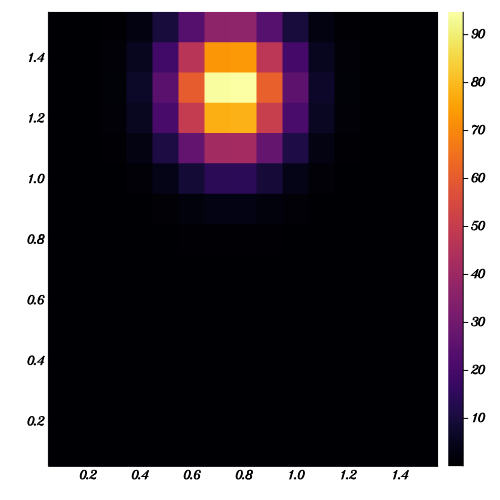

In [12]:
heatmap([1:size(image,1)]*pixel_size,[1:size(image,2)]*pixel_size,image*100)

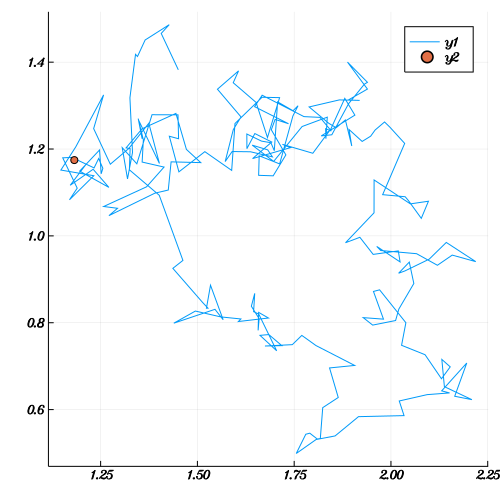

In [13]:
mobile = randn(length(image),2) .* sqrt((2*D*0.001))
startp = rand(2) * pixel_size * image_size
mobile = startp' .+ cumsum(mobile,dims=1)
plot(mobile[:,1],mobile[:,2])
scatter!([startp[1]],[startp[2]])

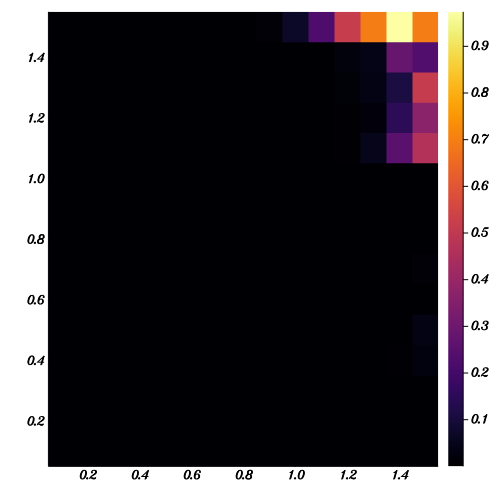

In [14]:
resetImage(image)
placeParticleMobile(mobile)
heatmap([1:size(image,1)] * pixel_size,[1:size(image,2)]*pixel_size,image)

In [15]:
Array{Int,2}(floor.(image*100))

15×15 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   2
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   3
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0
 0  0  0  0  0  0  0  0  0  0   0   0   4  25  46
 0  0  0  0  0  0  0  0  0  0   0   0   1  14  36
 0  0  0  0  0  0  0  0  0  0   0   1   3  10  51
 0  0  0  0  0  0  0  0  0  0   0   1   3  28  23
 0  0  0  0  0  0  0  0  0  6  22  51  69  97  69